## INDIAN FOREIGN EXCHANGE RATES 
PRANAV SUNDARESAN BABU<BR>
221710309048<BR>
CSE

## IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense,LSTM

Using TensorFlow backend.


In [2]:
print(pd.__version__)


1.0.5


In [3]:
print(np.__version__)

1.18.5


In [4]:
print(tf.__version__)

2.2.0


In [5]:
print(keras.__version__)

2.3.1


## READING THE DATASET

In [6]:
data=pd.read_csv('Foreign_Exchange_Rates.csv',na_values='ND')

## DATASET SHAPE

In [7]:
data.shape

(5217, 24)

## DATASET HEAD

In [8]:
data.head()

,Unnamed: 0,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,INDIA - INDIAN RUPEE/US$,KOREA - WON/US$,MEXICO - MEXICAN PESO/US$,SOUTH AFRICA - RAND/US$,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
0,0,2000-01-03,1.5172,0.9847,1.9033,0.6146,1.8050,1.4465,8.2798,7.7765,43.55,1128.0,9.4015,6.126,1.6563,7.3290,101.70,3.8,7.964,8.4430,72.30,1.5808,31.38,36.97
1,1,2000-01-04,1.5239,0.9700,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,43.55,1122.5,9.4570,6.085,1.6535,7.2180,103.09,3.8,7.934,8.3600,72.65,1.5565,30.60,37.13
2,2,2000-01-05,1.5267,0.9676,1.9339,0.6092,1.8560,1.4518,8.2798,7.7780,43.55,1135.0,9.5350,6.070,1.6560,7.2080,103.77,3.8,7.935,8.3530,72.95,1.5526,30.80,37.10
3,3,2000-01-06,1.5291,0.9686,1.9436,0.6070,1.8400,1.4571,8.2797,7.7785,43.55,1146.5,9.5670,6.080,1.6655,7.2125,105.19,3.8,7.940,8.3675,72.95,1.5540,31.75,37.62
4,4,2000-01-07,1.5272,0.9714,1.9380,0.6104,1.8310,1.4505,8.2794,7.7783,43.55,1138.0,9.5200,6.057,1.6625,7.2285,105.17,3.8,7.966,8.4150,73.15,1.5623,30.85,37.30


## PLOTTING INDIAN EXCHANGE RATE

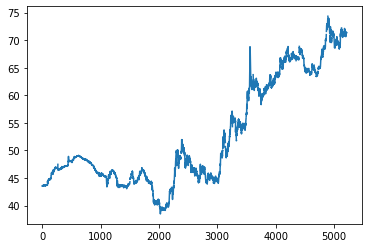

In [9]:
plt.plot(data['INDIA - INDIAN RUPEE/US$'])

## DATA FRAME

In [10]:
df=data['INDIA - INDIAN RUPEE/US$']
df


0       43.55
1       43.55
2       43.55
3       43.55
4       43.55
        ...  
5212      NaN
5213    71.28
5214    71.45
5215    71.30
5216    71.36
Name: INDIA - INDIAN RUPEE/US$, Length: 5217, dtype: float64

In [11]:
df.dropna(inplace=True)

In [12]:
df

0       43.55
1       43.55
2       43.55
3       43.55
4       43.55
        ...  
5211    71.23
5213    71.28
5214    71.45
5215    71.30
5216    71.36
Name: INDIA - INDIAN RUPEE/US$, Length: 5018, dtype: float64

## PREPROCESSING DATASET

In [13]:
df=np.array(df).reshape(-1,1)
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df=scaler.fit_transform(df)
print (df)

[[0.14142259]
 [0.14142259]
 [0.14142259]
 ...
 [0.91966527]
 [0.91548117]
 [0.91715481]]


## TRAINING AND TEST SETS 

In [14]:
train=df[:4800]
test=df[4800:]
print(train.shape)
print(test.shape)

(4800, 1)
(218, 1)


In [15]:
def get_data(data,look_back):
  data_x,data_y=[],[]
  for i in range(len(data)-look_back-1):
    data_x.append(data[i:(i+look_back),0])
    data_y.append(data[i+look_back,0])
  return np.array(data_x),np.array(data_y)
look_back=1
x_train,y_train=get_data(train,look_back)

print(x_train.shape)
print(y_train.shape)

(4798, 1)
(4798,)


In [16]:
x_test,y_test=get_data(test,look_back)
print(x_test.shape)
print(y_test.shape)

(216, 1)
(216,)


## PROCESSING TRAIN AND TEST SETS FOR LSTM MODELS

In [17]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)
print(x_train.shape)
print(x_test.shape)

(4798, 1, 1)
(216, 1, 1)


## DEFINING THE LSTM MODEL

In [18]:
n_features=x_train.shape[1]
model=Sequential()
model.add(LSTM(100,activation='relu',input_shape=(1,1)))
model.add(Dense(n_features))

## Model Summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


## COMPILING

In [19]:
model.compile(optimizer='adam',loss='mse')


## Training

In [20]:
model.fit(x_train,y_train, epochs = 5, batch_size=1)

Epoch 1/5
4798/4798 [==============================] - 9s 2ms/step - loss: 0.0053
Epoch 2/5
4798/4798 [==============================] - 8s 2ms/step - loss: 9.1773e-05
Epoch 3/5
4798/4798 [==============================] - 8s 2ms/step - loss: 7.3456e-05
Epoch 4/5
4798/4798 [==============================] - 9s 2ms/step - loss: 7.0139e-05
Epoch 5/5
4798/4798 [==============================] - 8s 2ms/step - loss: 7.2118e-05


## PREDICTING USING THE TRAINED MODEL

In [21]:
scaler.scale_
y_pred=model.predict(x_test)
y_pred=scaler.inverse_transform(y_pred)
print(y_pred[:15])

[[71.51821 ]
 [71.35618 ]
 [71.27518 ]
 [71.02214 ]
 [71.22456 ]
 [71.35618 ]
 [71.03226 ]
 [71.103096]
 [71.11322 ]
 [70.74901 ]
 [70.21327 ]
 [70.284   ]
 [70.19307 ]
 [70.01126 ]
 [69.809326]]


## PROCESSING TEST SHAPE

In [22]:
y_test = np.array(y_test).reshape(-1,1)
y_test = scaler.inverse_transform(y_test)
print(y_test[:10])


[[71.15]
 [71.07]
 [70.82]
 [71.02]
 [71.15]
 [70.83]
 [70.9 ]
 [70.91]
 [70.55]
 [70.02]]


## VISUALIZING THE RESULTS

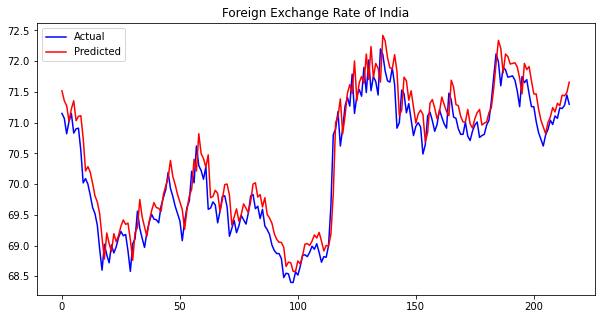

In [23]:
plt.figure(figsize=(10,5))
plt.title('Foreign Exchange Rate of India')
plt.plot(y_test , label = 'Actual', color = 'b')
plt.plot(y_pred , label = 'Predicted', color = 'r')
plt.legend()

## MEAN SQUARED ERROR

In [24]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.10532811725795937

## 10 original and predicted rates together

In [25]:
display(y_test[:10])
display(y_pred[:10])

array([[71.15],
       [71.07],
       [70.82],
       [71.02],
       [71.15],
       [70.83],
       [70.9 ],
       [70.91],
       [70.55],
       [70.02]])

array([[71.51821 ],
       [71.35618 ],
       [71.27518 ],
       [71.02214 ],
       [71.22456 ],
       [71.35618 ],
       [71.03226 ],
       [71.103096],
       [71.11322 ],
       [70.74901 ]], dtype=float32)